In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer 



In [2]:
X=pd.read_csv("C:/Users/lenovo/OneDrive/Desktop/DAN-P9-data/fichier_final_iteration1.csv",encoding = 'utf8')
X.head()

Zone  Disponibilite_autres_viandes  Disponibilite_cereales  \
0     Afghanistan                         260.0                    10.0   
1  Afrique du Sud                        1404.0                    75.0   
2         Albanie                          89.0                     0.0   
3         Algérie                         490.0                     8.0   
4       Allemagne                        5475.0                  2228.0   

   Disponibilite_volaille  Exportations_autres_viandes  Exportations_cereales  \
0                    57.0                          0.0                    0.0   
1                  2118.0                         76.0                   16.0   
2                    47.0                          0.0                    0.0   
3                   277.0                          0.0                    0.0   
4                  1739.0                       2956.0                  250.0   

   Exportations_volaille  Importations_autres_viandes  Importations_cereales  \
0                    0.0                          6.0                    0.0   
1                   63.0                         56.0                   15.0   
2                    0.0                         12.0                    1.0   
3                    0.0                         50.0                    8.0   
4                  646.0                       1725.0                  416.0   

   Importations_volaille  ...  Pertes_autres_viandes  Pertes_cereales  \
0                   29.0  ...                   14.0              0.0   
1                  514.0  ...                   71.0              1.0   
2                   38.0  ...                    0.0              0.0   
3                    2.0  ...                   22.0              0.0   
4                  842.0  ...                    5.0             73.0   

   Pertes_volaille  Production_autres_viandes  Production_cereales  \
0              2.0                      254.0                  9.0   
1             83.0                     1420.0                 74.0   
2              0.0                       77.0                  0.0   
3             13.0                      440.0                  0.0   
4              0.0                     6675.0               2360.0   

   Production_volaille  Population           PIB  Valeur_ajoutee_agriculture  \
0                 28.0   36296.113  1.889635e+04                 4992.453824   
1               1667.0   57009.756  3.808514e+05                 9497.680787   
2                 13.0    2884.169  1.301973e+04                 2476.629502   
3                275.0   41389.189  1.700970e+05                19996.432170   
4               1514.0   82658.409  3.690849e+06                31436.767780   

   Stabilite_politique  
0                -2.80  
1                -0.28  
2                 0.38  
3                -0.92  
4                 0.59  

[5 rows x 23 columns]

In [3]:
X[X.Zone.str.contains('Chine')]

Zone  Disponibilite_autres_viandes  \
31  Chine - RAS de Hong-Kong                         920.0   
32       Chine, continentale                       69100.0   

    Disponibilite_cereales  Disponibilite_volaille  \
31                    16.0                   280.0   
32                  4121.0                 18161.0   

    Exportations_autres_viandes  Exportations_cereales  Exportations_volaille  \
31                        171.0                   13.0                  663.0   
32                        303.0                  110.0                  576.0   

    Importations_autres_viandes  Importations_cereales  Importations_volaille  \
31                        952.0                   30.0                  907.0   
32                       2612.0                   50.0                  452.0   

    ...  Pertes_autres_viandes  Pertes_cereales  Pertes_volaille  \
31  ...                    0.0              0.0              0.0   
32  ...                 3307.0            210.0            643.0   

    Production_autres_viandes  Production_cereales  Production_volaille  \
31                      123.0                  0.0                 24.0   
32                    66454.0               4649.0              18236.0   

     Population          PIB  Valeur_ajoutee_agriculture  Stabilite_politique  
31     7306.322    341271.10                  222.756873                 0.83  
32  1421021.791  12310491.94               956685.057700                 1.43  

[2 rows x 23 columns]

In [4]:
X.set_index('Zone', inplace=True)

In [5]:
sc = StandardScaler()
Z = pd.DataFrame(sc.fit_transform(X), columns=X.columns,index=X.index)
Z

Disponibilite_autres_viandes  Disponibilite_cereales  \
Zone                                                                          
Afghanistan                               -0.164015               -0.271288   
Afrique du Sud                             0.037584               -0.219217   
Albanie                                   -0.194149               -0.279299   
Algérie                                   -0.123484               -0.272890   
Allemagne                                  0.754987                1.505538   
...                                             ...                     ...   
Émirats arabes unis                       -0.169654               -0.260072   
Équateur                                  -0.129475               -0.277696   
États-Unis d'Amérique                      3.651915                0.224589   
Éthiopie                                  -0.127184                4.569720   
Îles Salomon                              -0.208952               -0.279299   

                       Disponibilite_volaille  Exportations_autres_viandes  \
Zone                                                                         
Afghanistan                         -0.289039                    -0.322810   
Afrique du Sud                       0.647981                    -0.183287   
Albanie                             -0.293585                    -0.322810   
Algérie                             -0.189017                    -0.322810   
Allemagne                            0.475671                     5.103920   
...                                       ...                          ...   
Émirats arabes unis                 -0.127640                    -0.289765   
Équateur                            -0.159920                    -0.322810   
États-Unis d'Amérique                7.989556                     6.809411   
Éthiopie                            -0.308588                    -0.322810   
Îles Salomon                        -0.313589                    -0.322810   

                       Exportations_cereales  Exportations_volaille  \
Zone                                                                  
Afghanistan                        -0.341203              -0.217556   
Afrique du Sud                     -0.115759              -0.078150   
Albanie                            -0.341203              -0.217556   
Algérie                            -0.341203              -0.217556   
Allemagne                           3.181353               1.211908   
...                                      ...                    ...   
Émirats arabes unis                -0.228481              -0.009553   
Équateur                           -0.313022              -0.217556   
États-Unis d'Amérique               3.998586               7.952071   
Éthiopie                           -0.256661              -0.217556   
Îles Salomon                       -0.341203              -0.217556   

                       Importations_autres_viandes  Importations_cereales  \
Zone                                                                        
Afghanistan                              -0.383005              -0.358806   
Afrique du Sud                           -0.261608              -0.065174   
Albanie                                  -0.368438              -0.339231   
Algérie                                  -0.276176              -0.202202   
Allemagne                                 3.790639               7.784608   
...                                            ...                    ...   
Émirats arabes unis                       0.032174               0.248035   
Équateur                                 -0.395145              -0.339231   
États-Unis d'Amérique                     4.951199               6.433897   
Éthiopie                                 -0.395145              -0.300080   
Îles Salomon                             -0.395145              -0.358806   

                       Importations_volaille  Nourritu

In [6]:
kmo_all,kmo_model=calculate_kmo(Z)
kmo_model

C:\Users\lenovo\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.70333474272695

### KMO selon la charte qui est moyen

In [7]:
n_comp=3
fa = FactorAnalyzer(rotation = 'varimax',impute = "drop",n_factors=n_comp)
coord=fa.fit_transform(Z)

results=pd.DataFrame(fa.get_communalities(),columns=['communalities'])
results=results.join(pd.DataFrame(fa.loadings_))
results['components']=results.index+1
results['eigen_values']=fa.get_eigenvalues()[0]
results['variance_%']=list(fa.get_factor_variance()[1])+[None]*(results.shape[0]-n_comp)
results['cumulative_variance_%']=list(fa.get_factor_variance()[2])+[None]*(results.shape[0]-n_comp)

results.index=Z.columns
results

communalities         0         1         2  \
Disponibilite_autres_viandes       0.966748  0.932004  0.310321  0.042636   
Disponibilite_cereales             0.959057  0.167725  0.179636  0.947975   
Disponibilite_volaille             0.928794  0.721191  0.637596  0.046347   
Exportations_autres_viandes        0.772627  0.031949  0.865881  0.147837   
Exportations_cereales              0.424835  0.041374  0.598936  0.253769   
Exportations_volaille              0.606388  0.169441  0.759266 -0.034528   
Importations_autres_viandes        0.602599  0.466736  0.620281  0.002768   
Importations_cereales              0.595686  0.043265  0.770527  0.010089   
Importations_volaille              0.136343  0.166366  0.327202 -0.040056   
Nourriture_autres_viandes          0.966039  0.926649  0.325717  0.035617   
Nourriture_cereales                0.815510  0.173238 -0.046685  0.885053   
Nourriture_volaille                0.926306  0.710405  0.648733  0.027872   
Pertes_autres_viandes              0.931785  0.943933 -0.010617  0.201649   
Pertes_cereales                    0.792254  0.154570  0.085229  0.872410   
Pertes_volaille                    0.741876  0.680911 -0.020291  0.527091   
Production_autres_viandes          0.961299  0.911460  0.356620  0.057985   
Production_cereales                0.966130  0.186082  0.179229  0.948357   
Production_volaille                0.885168  0.645312  0.683645  0.037024   
Population                         0.906704  0.766974  0.131725  0.548730   
PIB                                0.856232  0.573832  0.725302  0.029764   
Valeur_ajoutee_agriculture         0.983796  0.919205  0.136132  0.346881   
Stabilite_politique                0.050273  0.067587  0.132267 -0.167958   

                              components  eigen_values  variance_%  \
Disponibilite_autres_viandes           1     10.910586    0.341658   
Disponibilite_cereales                 2      3.870027    0.229482   
Disponibilite_volaille                 3      2.530700    0.191426   
Exportations_autres_viandes            4      1.384951         NaN   
Exportations_cereales                  5      0.966518         NaN   
Exportations_volaille                  6      0.637474         NaN   
Importations_autres_viandes            7      0.480304         NaN   
Importations_cereales                  8      0.422764         NaN   
Importations_volaille                  9      0.290116         NaN   
Nourriture_autres_viandes             10      0.143007         NaN   
Nourriture_cereales                   11      0.111034         NaN   
Nourriture_volaille                   12      0.090011         NaN   
Pertes_autres_viandes                 13      0.080735         NaN   
Pertes_cereales                       14      0.041800         NaN   
Pertes_volaille                       15      0.030807         NaN   
Production_autres_viandes             16      0.004887         NaN   
Production_cereales                   17      0.003604         NaN   
Production_volaille                   18      0.000366         NaN   
Population                            19      0.000138         NaN   
PIB                                   20      0.000124         NaN   
Valeur_ajoutee_agriculture            21      0.000040         NaN   
Stabilite_politique                   22      0.000008         NaN   

                              cumulative_variance_%  
Disponibilite_autres_viandes               0.341658  
Disponibilite_cereales                     0.571140  
Disponibilite_volaille                     0.762566  
Exportations_autres_viandes                     NaN  
Exportations_cereales                           NaN  
Exportations_volaille                           NaN  
Importations_autres_viandes                     NaN  
Importations_cereales                           NaN  
Importations_volaille                           NaN  
Nourriture_autres_viandes                       NaN  
Nourriture_cereales                             NaN  

### Communalities : on supprime les variables qui sont expliquees a moins de 30% 

In [8]:
Z.drop(columns=['Stabilite_politique','Importations_volaille'],inplace=True)
Z.head()

Disponibilite_autres_viandes  Disponibilite_cereales  \
Zone                                                                   
Afghanistan                        -0.164015               -0.271288   
Afrique du Sud                      0.037584               -0.219217   
Albanie                            -0.194149               -0.279299   
Algérie                            -0.123484               -0.272890   
Allemagne                           0.754987                1.505538   

                Disponibilite_volaille  Exportations_autres_viandes  \
Zone                                                                  
Afghanistan                  -0.289039                    -0.322810   
Afrique du Sud                0.647981                    -0.183287   
Albanie                      -0.293585                    -0.322810   
Algérie                      -0.189017                    -0.322810   
Allemagne                     0.475671                     5.103920   

                Exportations_cereales  Exportations_volaille  \
Zone                                                           
Afghanistan                 -0.341203              -0.217556   
Afrique du Sud              -0.115759              -0.078150   
Albanie                     -0.341203              -0.217556   
Algérie                     -0.341203              -0.217556   
Allemagne                    3.181353               1.211908   

                Importations_autres_viandes  Importations_cereales  \
Zone                                                                 
Afghanistan                       -0.383005              -0.358806   
Afrique du Sud                    -0.261608              -0.065174   
Albanie                           -0.368438              -0.339231   
Algérie                           -0.276176              -0.202202   
Allemagne                          3.790639               7.784608   

                Nourriture_autres_viandes  Nourriture_cereales  \
Zone                                                             
Afghanistan                     -0.166688            -0.177298   
Afrique du Sud                   0.035924            -0.123597   
Albanie                         -0.195554            -0.187581   
Algérie                         -0.125688            -0.184153   
Allemagne                        0.793790            -0.164729   

                Nourriture_volaille  Pertes_autres_viandes  Pertes_cereales  \
Zone                                                                          
Afghanistan               -0.282418              -0.088771        -0.294535   
Afrique du Sud             0.639104               0.128960        -0.279808   
Albanie                   -0.286141              -0.142249        -0.294535   
Algérie                   -0.185146              -0.058213        -0.294535   
Allemagne                  0.440838              -0.123150         0.780517   

                Pertes_volaille  Production_autres_viandes  \
Zone                                                         
Afghanistan           -0.196261                  -0.170279   
Afrique du Sud         0.830351                   0.039398   
Albanie               -0.221609                  -0.202108   
Algérie               -0.056844                  -0.136831   
Allemagne             -0.221609                   0.984381   

                Production_cereales  Production_volaille  Population  \
Zone                                                                   
Afghanistan               -0.270189            -0.276193   -0.048964   
Afrique du Sud            -0.220770             0.378905    0.084881   
Albanie                   -0.277032            -0.282189   -0.264862   
Algérie                   -0.277032            -0.177469   -0.016054   
Allemagne                  1.517278             0.317752    0.250615   

                     PIB  Valeur_ajoutee_agriculture  
Zone                                                  
Afghan

In [9]:
n_comp=3
fa = FactorAnalyzer(rotation = 'varimax',impute = "drop",n_factors=n_comp)
coord=fa.fit_transform(Z)

results=pd.DataFrame(fa.get_communalities(),columns=['communalities'])
results=results.join(pd.DataFrame(fa.loadings_))
results['components']=results.index+1
results['eigen_values']=fa.get_eigenvalues()[0]
results['variance_%']=list(fa.get_factor_variance()[1])+[None]*(results.shape[0]-n_comp)
results['cumulative_variance_%']=list(fa.get_factor_variance()[2])+[None]*(results.shape[0]-n_comp)

results.index=Z.columns
results

communalities         0         1         2  \
Disponibilite_autres_viandes       0.965818  0.939295  0.277513  0.080807   
Disponibilite_cereales             0.962739  0.134956  0.177397  0.955540   
Disponibilite_volaille             0.941751  0.740819  0.623332  0.066296   
Exportations_autres_viandes        0.779169  0.053363  0.868326  0.149439   
Exportations_cereales              0.419717  0.051574  0.591637  0.258888   
Exportations_volaille              0.647902  0.192830  0.780438 -0.040439   
Importations_autres_viandes        0.554249  0.486960  0.561898  0.037270   
Importations_cereales              0.557317  0.074018  0.742684  0.016072   
Nourriture_autres_viandes          0.965347  0.934808  0.293453  0.073254   
Nourriture_cereales                0.805017  0.135917 -0.043197  0.885820   
Nourriture_volaille                0.940581  0.731214  0.635373  0.046990   
Pertes_autres_viandes              0.935735  0.934551 -0.048685  0.244907   
Pertes_cereales                    0.783721  0.123156  0.086812  0.872363   
Pertes_volaille                    0.747477  0.658301 -0.047985  0.558404   
Production_autres_viandes          0.962046  0.919644  0.327808  0.094035   
Production_cereales                0.970605  0.153100  0.176556  0.957075   
Production_volaille                0.910462  0.666664  0.680745  0.051046   
Population                         0.905214  0.748224  0.108891  0.577509   
PIB                                0.857292  0.596938  0.706003  0.050165   
Valeur_ajoutee_agriculture         0.984109  0.908374  0.106523  0.384211   

                              components  eigen_values  variance_%  \
Disponibilite_autres_viandes           1     10.814481    0.376924   
Disponibilite_cereales                 2      3.761998    0.235251   
Disponibilite_volaille                 3      2.518730    0.217639   
Exportations_autres_viandes            4      0.921971         NaN   
Exportations_cereales                  5      0.585979         NaN   
Exportations_volaille                  6      0.474019         NaN   
Importations_autres_viandes            7      0.326647         NaN   
Importations_cereales                  8      0.180882         NaN   
Nourriture_autres_viandes              9      0.135004         NaN   
Nourriture_cereales                   10      0.098884         NaN   
Nourriture_volaille                   11      0.090418         NaN   
Pertes_autres_viandes                 12      0.047359         NaN   
Pertes_cereales                       13      0.031770         NaN   
Pertes_volaille                       14      0.005204         NaN   
Production_autres_viandes             15      0.004760         NaN   
Production_cereales                   16      0.001560         NaN   
Production_volaille                   17      0.000147         NaN   
Population                            18      0.000137         NaN   
PIB                                   19      0.000040         NaN   
Valeur_ajoutee_agriculture            20      0.000008         NaN   

                              cumulative_variance_%  
Disponibilite_autres_viandes               0.376924  
Disponibilite_cereales                     0.612175  
Disponibilite_volaille                     0.829813  
Exportations_autres_viandes                     NaN  
Exportations_cereales                           NaN  
Exportations_volaille                           NaN  
Importations_autres_viandes                     NaN  
Importations_cereales                           NaN  
Nourriture_autres_viandes                       NaN  
Nourriture_cereales                             NaN  
Nourriture_volaille                             NaN  
Pertes_autres_viandes                           NaN  
Pertes_cereales                                 NaN  
Pertes_volaille                                 NaN  
Production_autres_viandes                       NaN  
Production_cereales                             NaN  
Production_volaille    

### les communalities sont toutes superieure 0,30 et sont expliquees toute a plus de 30% par l'ACP

les valeurs propres, en appliquant cette regle on garde que 3 facteurs soit les 3 premmiers facteurs,superieurs a 1

les 3 facteurs expliquent 82% de la variance de toutes les variables(45-24-12%)

### le facteur 0 designe le developpement general
### le facteur 1 designe le developpement agricole
### le facteur2 designe l'autosuffisance en cereales

In [10]:
p=Z.shape[1]
n=Z.shape[0]

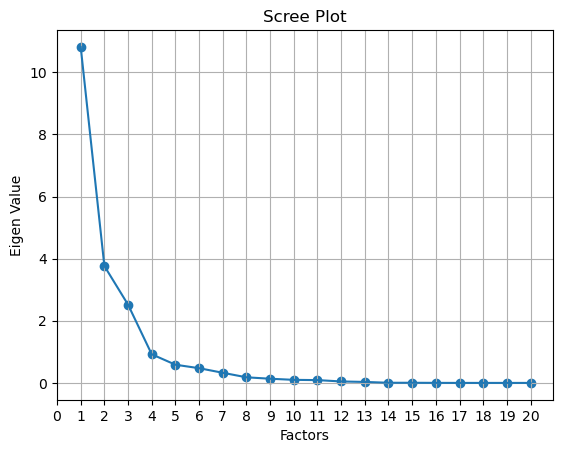

In [11]:
plt.scatter(range(1,p+1),results.eigen_values)
plt.plot(range(1,p+1),results.eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.xticks(np.arange(0, p+1, step=1))
plt.grid()

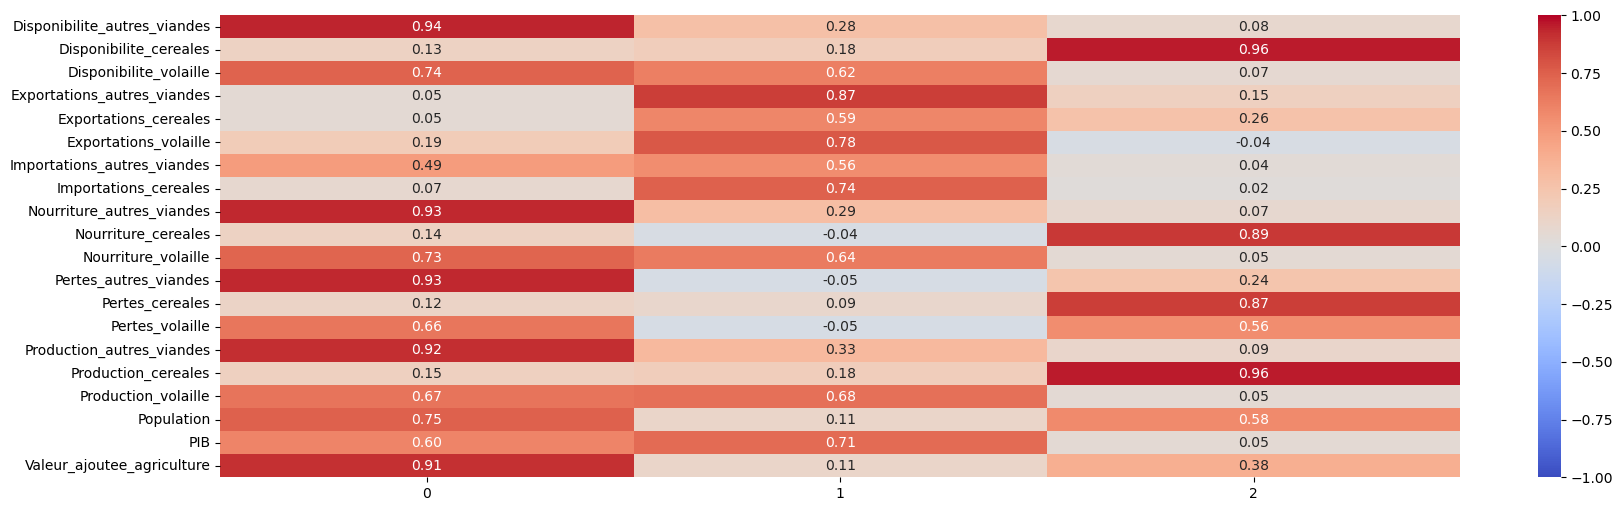

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(results.iloc[:,1:n_comp+1], vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f");

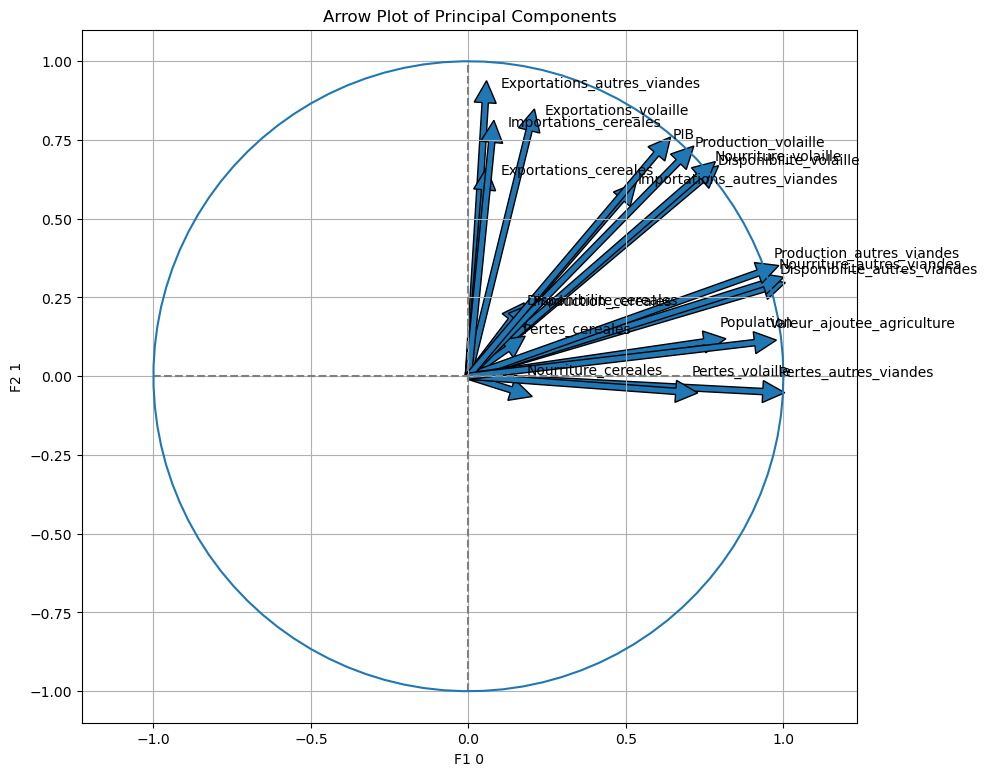

In [13]:
x, y = 0,1
plt.figure(figsize=(10, 9))
for i in range(p):
    plt.subplot(111) 
    plt.arrow(0,
             0,
             results.iloc[i, x+1], 
             results.iloc[i, y+1],
             head_width=0.07,
             head_length=0.07, 
             width=0.02)

    plt.text(results.iloc[i, x+1] + 0.05,
             results.iloc[i, y+1] + 0.05,
             results.index[i])



plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


v1 = str(x)
v2 = str(y)


plt.xlabel(f'F{x+1} {v1}')
plt.ylabel(f'F{y+1} {v2}')


plt.grid()


plt.title('Arrow Plot of Principal Components')

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)

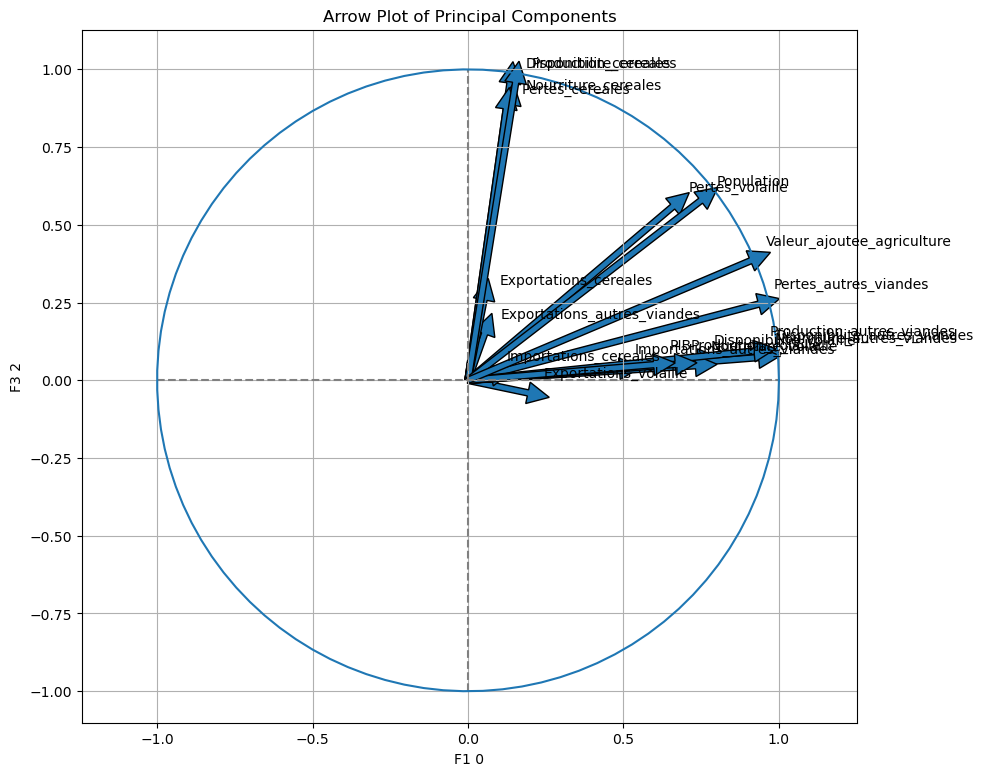

In [14]:
x, y = 0,2
plt.figure(figsize=(10, 9))
for i in range(p):
    plt.subplot(111) 
    plt.arrow(0,
             0,
             results.iloc[i, x+1], 
             results.iloc[i, y+1],
             head_width=0.07,
             head_length=0.07, 
             width=0.02)

    plt.text(results.iloc[i, x+1] + 0.05,
             results.iloc[i, y+1] + 0.05,
             results.index[i])



plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


v1 = str(x)
v2 = str(y)


plt.xlabel(f'F{x+1} {v1}')
plt.ylabel(f'F{y+1} {v2}')


plt.grid()


plt.title('Arrow Plot of Principal Components')

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)

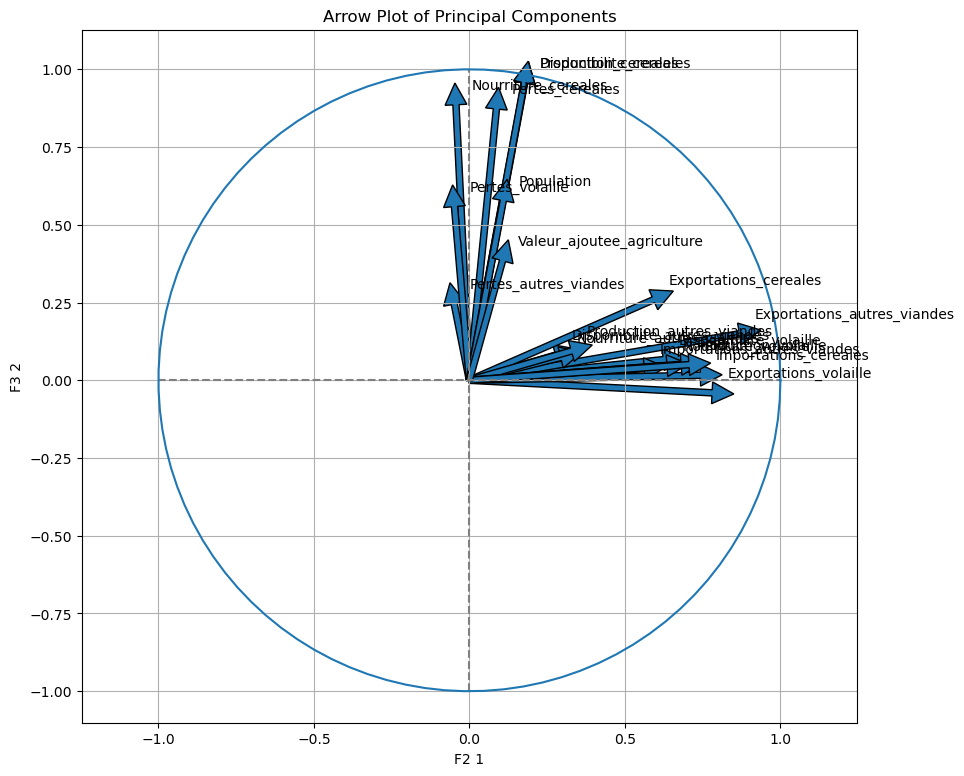

In [15]:
x, y = 1,2
plt.figure(figsize=(10, 9))
for i in range(p):
    plt.subplot(111) 
    plt.arrow(0,
             0,
             results.iloc[i, x+1], 
             results.iloc[i, y+1],
             head_width=0.07,
             head_length=0.07, 
             width=0.02)

    plt.text(results.iloc[i, x+1] + 0.05,
             results.iloc[i, y+1] + 0.05,
             results.index[i])



plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


v1 = str(x)
v2 = str(y)


plt.xlabel(f'F{x+1} {v1}')
plt.ylabel(f'F{y+1} {v2}')


plt.grid()


plt.title('Arrow Plot of Principal Components')

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)

In [16]:
df_pca=pd.DataFrame(coord)
columns=['developpement_general','developpement_agricol','autosuffisance_cereales']
df_pca.columns=columns
df_pca.index=Z.index
df_pca.head()

developpement_general  developpement_agricol  \
Zone                                                           
Afghanistan                 -0.047997              -0.359986   
Afrique du Sud               0.903627              -0.242876   
Albanie                     -0.089329              -0.301560   
Algérie                     -0.018776              -0.273214   
Allemagne                   -2.118621               4.976120   

                autosuffisance_cereales  
Zone                                     
Afghanistan                   -0.062347  
Afrique du Sud                -0.873044  
Albanie                       -0.255310  
Algérie                       -0.239271  
Allemagne                      2.226343

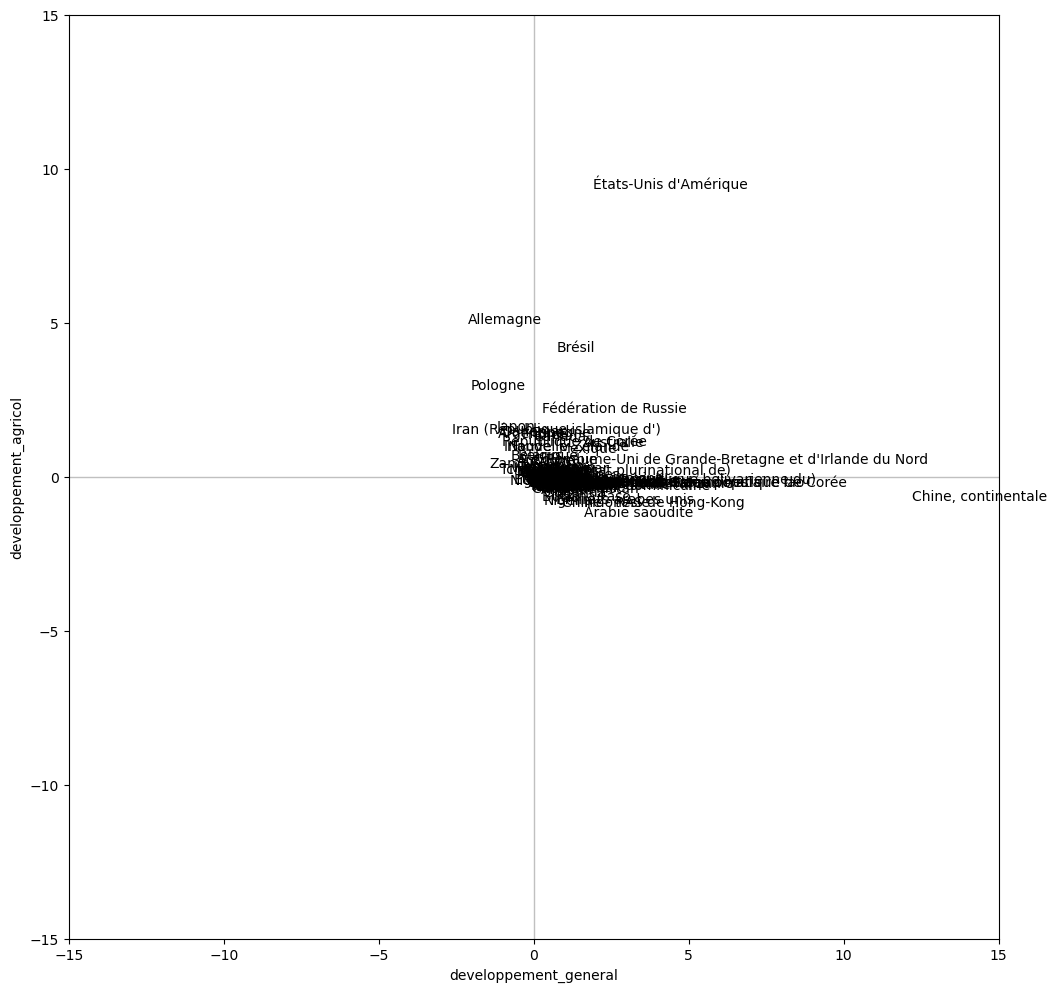

In [17]:
plan=(0,1)
s=15
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-s,s) #même limites en abscisse
axes.set_ylim(-s,s) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df_pca.index[i],(df_pca[df_pca.columns[plan[0]]][i],df_pca[df_pca.columns[plan[1]]][i]))
plt.xlabel(df_pca.columns[plan[0]])
plt.ylabel(df_pca.columns[plan[1]])
#ajouter les axes
plt.plot([-s,s],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-s,s],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [18]:
## l'Inde Chine et USA -> pays aberrant il faudra le traiter a part 

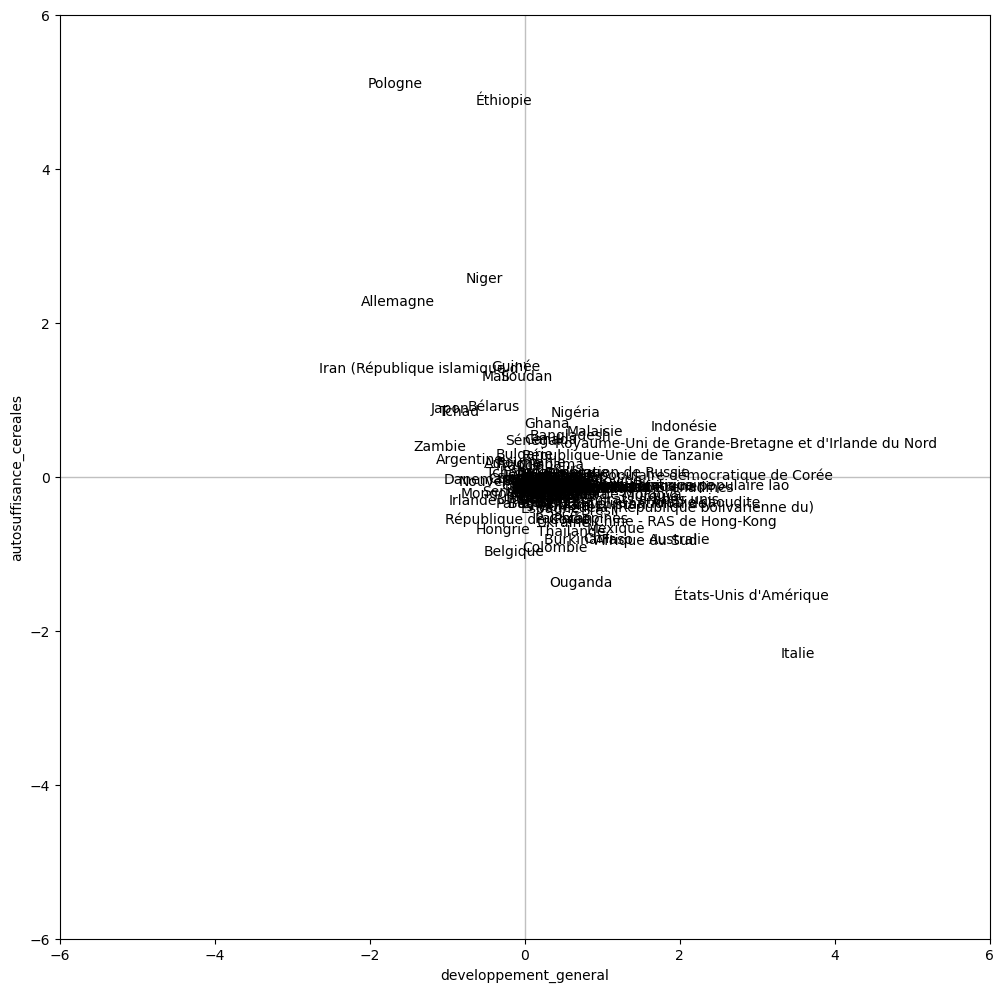

In [19]:
plan=(0,2)
fig, axes = plt.subplots(figsize=(12,12))
s=6
axes.set_xlim(-s,s) #même limites en abscisse
axes.set_ylim(-s,s) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df_pca.index[i],(df_pca[df_pca.columns[plan[0]]][i],df_pca[df_pca.columns[plan[1]]][i]))
plt.xlabel(df_pca.columns[plan[0]])
plt.ylabel(df_pca.columns[plan[1]])
#ajouter les axes
plt.plot([-s,s],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-s,s],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [20]:
# bresil comme pays aberrant

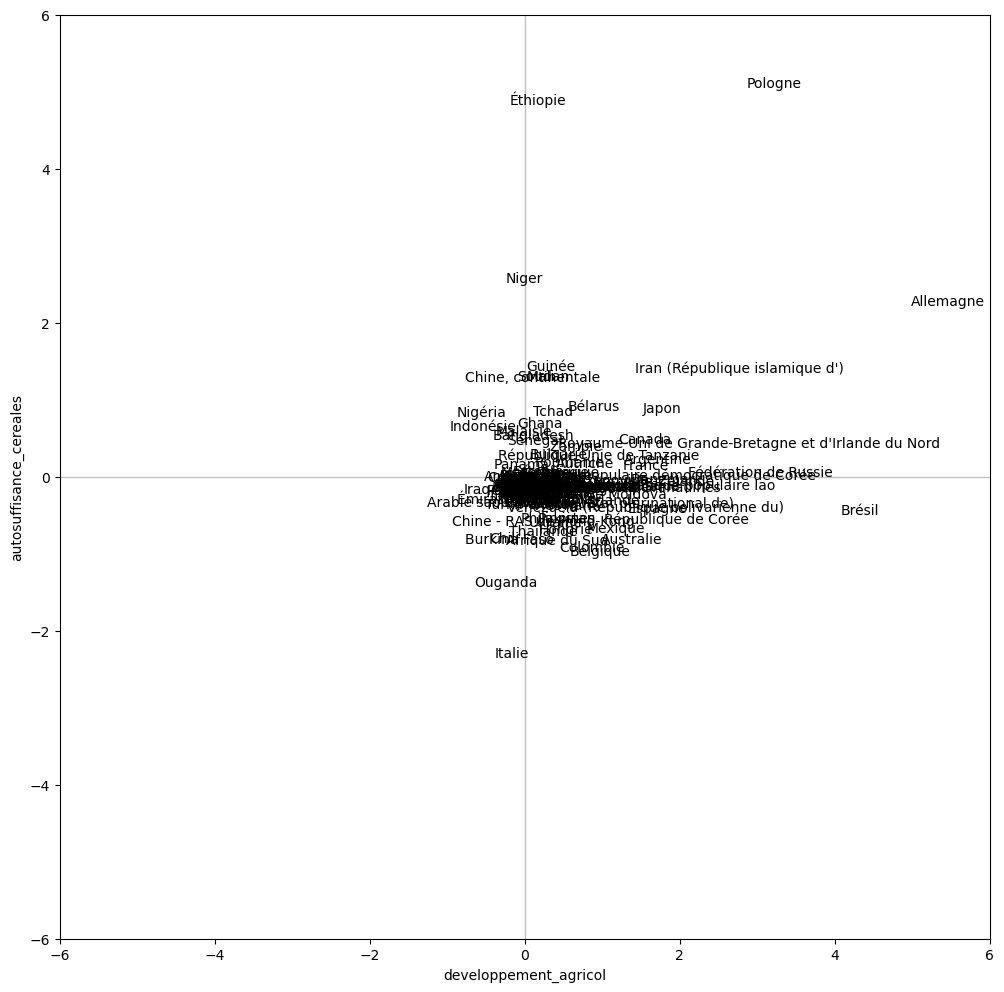

In [21]:
plan=(1,2)
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df_pca.index[i],(df_pca[df_pca.columns[plan[0]]][i],df_pca[df_pca.columns[plan[1]]][i]))
plt.xlabel(df_pca.columns[plan[0]])
plt.ylabel(df_pca.columns[plan[1]])
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

# clusterings

https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


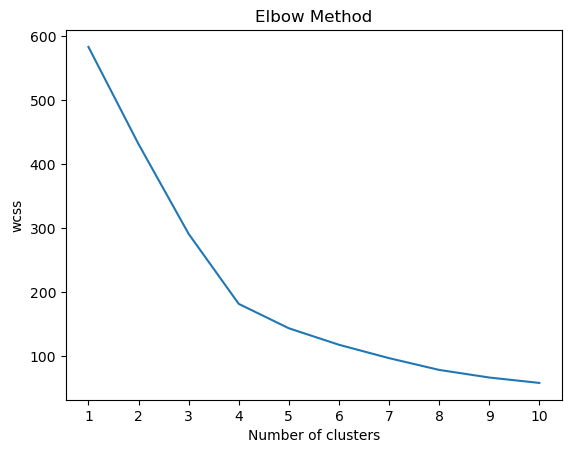

In [22]:
X=df_pca
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.xticks(range(1,11))
plt.show()

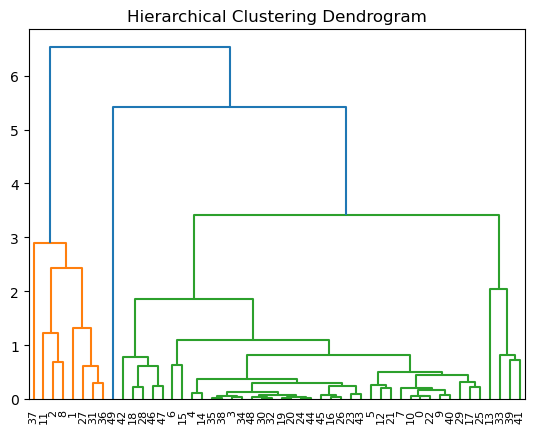

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z2 = linkage(df_pca.sample(n=50), method="ward")
pd.DataFrame(Z2)
_ = dendrogram(Z2)

plt.title("Hierarchical Clustering Dendrogram")
plt.axhline(y=40, color='red', linestyle='--', label='y = 20')
plt.show()

In [24]:
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
X['clusters']=y_means
X.head(10)

developpement_general  developpement_agricol  \
Zone                                                               
Afghanistan                     -0.047997              -0.359986   
Afrique du Sud                   0.903627              -0.242876   
Albanie                         -0.089329              -0.301560   
Algérie                         -0.018776              -0.273214   
Allemagne                       -2.118621               4.976120   
Angola                           0.233819              -0.525664   
Antigua-et-Barbuda              -0.118562              -0.301135   
Arabie saoudite                  1.629068              -1.266264   
Argentine                       -1.152408               1.279937   
Arménie                         -0.232432              -0.234829   

                    autosuffisance_cereales  clusters  
Zone                                                   
Afghanistan                       -0.062347         0  
Afrique du Sud                    -0.873044         0  
Albanie                           -0.255310         0  
Algérie                           -0.239271         0  
Allemagne                          2.226343         2  
Angola                            -0.047223         0  
Antigua-et-Barbuda                -0.178338         0  
Arabie saoudite                   -0.387716         0  
Argentine                          0.180393         0  
Arménie                           -0.241386         0

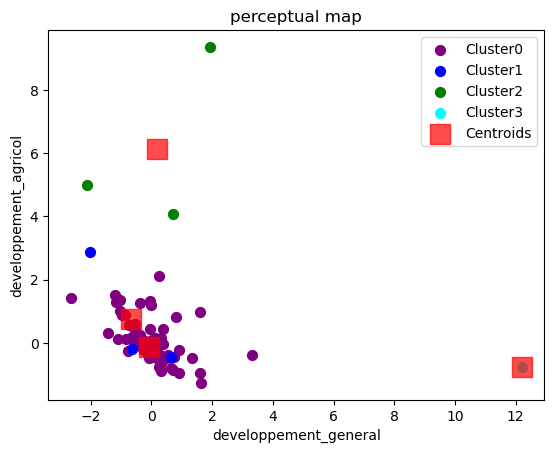

In [36]:
plan=(0,1)
plt.scatter(X[y_means==0][X.columns[plan[0]]],X[y_means==0][X.columns[plan[1]]],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1][X.columns[plan[0]]],X[y_means==1][X.columns[plan[1]]],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2][X.columns[plan[0]]],X[y_means==2][X.columns[plan[1]]],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==3][X.columns[plan[0]]],X[y_means==3][X.columns[plan[1]]],s=50, c='cyan',label='Cluster3')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

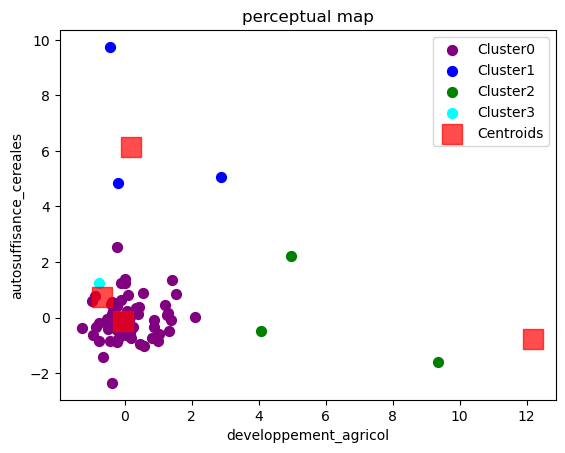

In [37]:
plan=(1,2)
plt.scatter(X[y_means==0][X.columns[plan[0]]],X[y_means==0][X.columns[plan[1]]],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1][X.columns[plan[0]]],X[y_means==1][X.columns[plan[1]]],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2][X.columns[plan[0]]],X[y_means==2][X.columns[plan[1]]],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==3][X.columns[plan[0]]],X[y_means==3][X.columns[plan[1]]],s=50, c='cyan',label='Cluster3')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

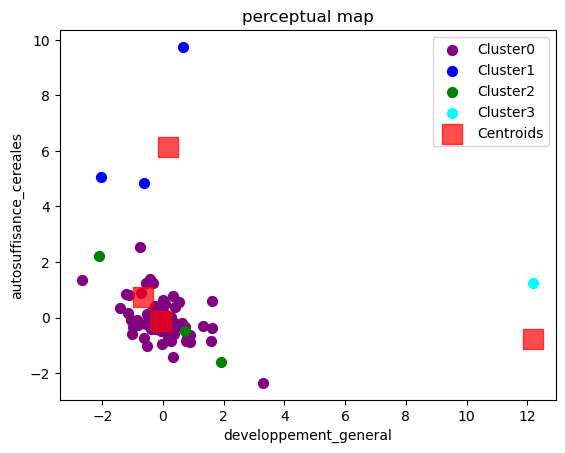

In [38]:
plan=(0,2)
plt.scatter(X[y_means==0][X.columns[plan[0]]],X[y_means==0][X.columns[plan[1]]],s=50, c='purple',label='Cluster0')
plt.scatter(X[y_means==1][X.columns[plan[0]]],X[y_means==1][X.columns[plan[1]]],s=50, c='blue',label='Cluster1')
plt.scatter(X[y_means==2][X.columns[plan[0]]],X[y_means==2][X.columns[plan[1]]],s=50, c='green',label='Cluster2')
plt.scatter(X[y_means==3][X.columns[plan[0]]],X[y_means==3][X.columns[plan[1]]],s=50, c='cyan',label='Cluster3')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

In [28]:
clust=X.groupby('clusters').agg(np.mean)
clust

developpement_general  developpement_agricol  \
clusters                                                 
0                     -0.066998              -0.123988   
1                     -0.668489               0.736064   
2                      0.175033               6.135959   
3                     12.200035              -0.778032   

          autosuffisance_cereales  
clusters                           
0                       -0.131456  
1                        6.547681  
2                        0.048464  
3                        1.244598

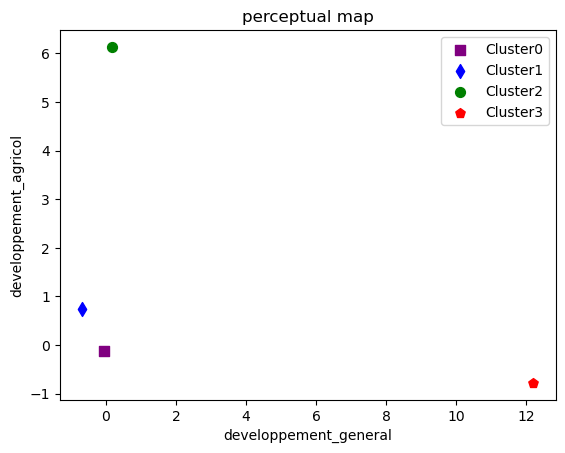

In [39]:
plan=(0,1)
plt.scatter(clust[X.columns[plan[0]]][0],clust[X.columns[plan[1]]][0],s=50, marker='s', c='purple',label='Cluster0')
plt.scatter(clust[X.columns[plan[0]]][1],clust[X.columns[plan[1]]][1],s=50, marker='d', c='blue',label='Cluster1')
plt.scatter(clust[X.columns[plan[0]]][2],clust[X.columns[plan[1]]][2],s=50,marker='o', c='green',label='Cluster2')
plt.scatter(clust[X.columns[plan[0]]][3],clust[X.columns[plan[1]]][3],s=50,marker='p', c='red',label='Cluster3')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

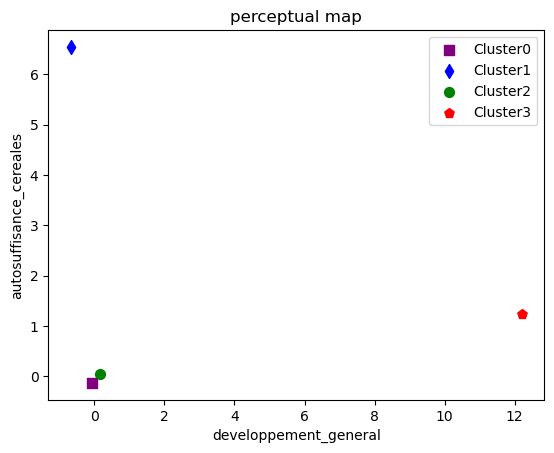

In [40]:
plan=(0,2)
plt.scatter(clust[X.columns[plan[0]]][0],clust[X.columns[plan[1]]][0],s=50, marker='s', c='purple',label='Cluster0')
plt.scatter(clust[X.columns[plan[0]]][1],clust[X.columns[plan[1]]][1],s=50, marker='d', c='blue',label='Cluster1')
plt.scatter(clust[X.columns[plan[0]]][2],clust[X.columns[plan[1]]][2],s=50,marker='o', c='green',label='Cluster2')
plt.scatter(clust[X.columns[plan[0]]][3],clust[X.columns[plan[1]]][3],s=50,marker='p', c='red',label='Cluster3')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

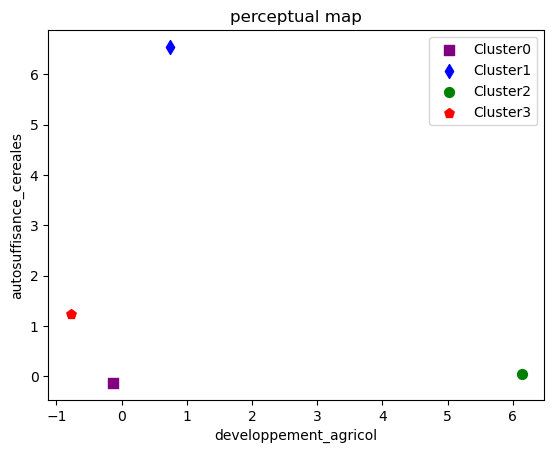

In [41]:
plan=(1,2)
plt.scatter(clust[X.columns[plan[0]]][0],clust[X.columns[plan[1]]][0],s=50, marker='s', c='purple',label='Cluster0')
plt.scatter(clust[X.columns[plan[0]]][1],clust[X.columns[plan[1]]][1],s=50, marker='d', c='blue',label='Cluster1')
plt.scatter(clust[X.columns[plan[0]]][2],clust[X.columns[plan[1]]][2],s=50,marker='o', c='green',label='Cluster2')
plt.scatter(clust[X.columns[plan[0]]][3],clust[X.columns[plan[1]]][3],s=50,marker='p', c='red',label='Cluster3')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

### pour le cluster 3 , developpement agricole faible , autosuffisance cereales moyenne et developpement generale fort
### cluster 2 => dev agricole fort , autosuffisance faible et dev gen faible
### cluster 1 => dev agricole moyen, autosuffisance forte et dev gen faible
### cluster 0 => dev agricole faible, autosuffisance faible et dev gen faible 

In [45]:
X[X.clusters==0]

developpement_general  developpement_agricol  \
Zone                                                                
Afghanistan                      -0.047997              -0.359986   
Afrique du Sud                    0.903627              -0.242876   
Albanie                          -0.089329              -0.301560   
Algérie                          -0.018776              -0.273214   
Angola                            0.233819              -0.525664   
...                                    ...                    ...   
Zimbabwe                         -0.042884              -0.337348   
Égypte                            0.275447              -0.046799   
Émirats arabes unis               0.728061              -0.871636   
Équateur                          0.104557              -0.280871   
Îles Salomon                     -0.119128              -0.297218   

                     autosuffisance_cereales  clusters  
Zone                                                    
Afghanistan                        -0.062347         0  
Afrique du Sud                     -0.873044         0  
Albanie                            -0.255310         0  
Algérie                            -0.239271         0  
Angola                             -0.047223         0  
...                                      ...       ...  
Zimbabwe                           -0.209610         0  
Égypte                             -0.004337         0  
Émirats arabes unis                -0.343209         0  
Équateur                           -0.389115         0  
Îles Salomon                       -0.192960         0  

[160 rows x 4 columns]

In [32]:
X[X.clusters==0].sort_values(['developpement_agricol','developpement_general', 'autosuffisance_cereales'],
              ascending = [True, True, True])

developpement_general  developpement_agricol  \
Zone                                                                           
Arabie saoudite                              1.629068              -1.266264   
Indonésie                                    1.615794              -0.971095   
Chine - RAS de Hong-Kong                     0.894105              -0.944796   
Nigéria                                      0.330950              -0.880200   
Émirats arabes unis                          0.728061              -0.871636   
...                                               ...                    ...   
Espagne                                     -0.057185               1.321810   
Danemark                                    -1.047797               1.363043   
Iran (République islamique d')              -2.653419               1.418867   
Japon                                       -1.212541               1.516638   
Fédération de Russie                         0.260835               2.103977   

                                autosuffisance_cereales  clusters  
Zone                                                               
Arabie saoudite                               -0.387716         0  
Indonésie                                      0.598581         0  
Chine - RAS de Hong-Kong                      -0.630051         0  
Nigéria                                        0.784067         0  
Émirats arabes unis                           -0.343209         0  
...                                                 ...       ...  
Espagne                                       -0.466759         0  
Danemark                                      -0.081765         0  
Iran (République islamique d')                 1.353594         0  
Japon                                          0.836728         0  
Fédération de Russie                           0.012763         0  

[160 rows x 4 columns]

In [42]:
X[X.clusters==1].sort_values(['developpement_agricol','developpement_general', 'autosuffisance_cereales'],
              ascending = [True, True, True])

developpement_general  developpement_agricol  \
Zone                                                     
Inde                   0.662213              -0.449632   
Éthiopie              -0.639267              -0.198826   
Pologne               -2.028412               2.856650   

          autosuffisance_cereales  clusters  
Zone                                         
Inde                     9.745912         1  
Éthiopie                 4.834874         1  
Pologne                  5.062259         1

In [43]:
X[X.clusters==2].sort_values(['developpement_agricol','developpement_general', 'autosuffisance_cereales'],
              ascending = [True, True, True])

developpement_general  developpement_agricol  \
Zone                                                                  
Brésil                              0.721477               4.071090   
Allemagne                          -2.118621               4.976120   
États-Unis d'Amérique               1.922243               9.360668   

                       autosuffisance_cereales  clusters  
Zone                                                      
Brésil                               -0.490129         2  
Allemagne                             2.226343         2  
États-Unis d'Amérique                -1.590823         2

In [44]:
X[X.clusters==3].sort_values(['developpement_agricol','developpement_general', 'autosuffisance_cereales'],
              ascending = [True, True, True])

developpement_general  developpement_agricol  \
Zone                                                                
Chine, continentale              12.200035              -0.778032   

                     autosuffisance_cereales  clusters  
Zone                                                    
Chine, continentale                 1.244598         3